# Lab2: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [235]:
import seaborn
import pandas as pd
import sklearn
from sklearn.datasets import load_boston
boston= load_boston()
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
import numpy as np
import matplotlib.pyplot as plt


### Read the csv data into a pandas dataframe and display the first 5 samples

In [236]:
# read csv file
house = pd.read_csv("Real estate.csv")
# display DataFrame
print(house)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

### Show more information about the dataset

In [237]:
house.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Find how many samples are there and how many columns are there in the dataset

In [251]:
data=pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### What are the features available in the dataset?

In [252]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Check if any features have missing data

In [253]:
data.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


### Group all the features as dependent features in X

In [254]:
x = boston.data
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

### Group feature(s) as independent features in y

In [255]:
y = boston.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Split the dataset into train and test data

In [256]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(303, 13)
(203, 13)
(303,)
(203,)


### Choose the model (Linear Regression)

In [257]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
Regressor = LinearRegression()
Regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
### Create an Estimator object

In [246]:
model = LinearRegression().fit(x, y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Train the model

In [247]:

regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Apply the model

In [217]:
y_pred = regressor.predict(x_test)
y_pred

array([32.5767836 , 28.31584043, 18.02490895, 21.22723902, 18.30706301,
       20.41855673, 33.00388637, 18.23492365, 24.15996405, 26.44388935,
       26.89587445, 29.11404673, 20.47403529, 26.72290735, 23.00917779,
       20.06036007, 17.93614868, 38.60918158, 30.21848598,  8.72510853,
       20.4218793 , 15.62926355, 25.14572116, 24.8208665 , 31.33254683,
       10.32111619, 13.97300109, 16.59941009, 36.11111224, 14.50980925,
       21.75924461, 14.18085506, 43.80568262, 18.29067878, 21.0769219 ,
       20.36535011, 17.77192542, 27.41157074,  8.78516292, 19.77211274,
       23.57601701, 21.48478378, 29.01124151, 16.29101185, 19.34443514,
       14.72102079, 39.10168604, 18.15651807, 24.90906159, 19.6083671 ,
       25.34392074, 24.35100549, 24.85160986, 25.8996609 ,  4.61421883,
       24.39859206, 11.27077844, 26.40774218, 17.10969386, 36.0904063 ,
       19.67664968, 27.23937264, 16.53365016, 18.15907977, 11.30355765,
       31.98198816, 36.95839215, 21.45909144, 24.13250983, 24.41

### Display the coefficients

In [218]:
regressor.coef_

array([-8.95714048e-02,  6.73132853e-02,  5.04649248e-02,  2.18579583e+00,
       -1.72053975e+01,  3.63606995e+00,  2.05579939e-03, -1.36602886e+00,
        2.89576718e-01, -1.22700072e-02, -8.34881849e-01,  9.40360790e-03,
       -5.04008320e-01])

### Find how well the trained model did with testing data

### Plot House Age Vs Price
#### Hint: Use regplot in sns

AttributeError: module 'seaborn' has no attribute 'plt'

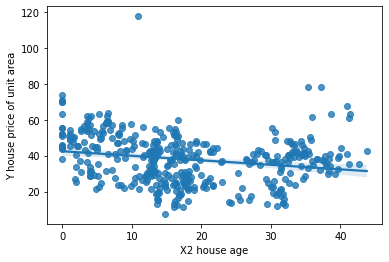

In [226]:
ax = sns.regplot(x="X2 house age", y="Y house price of unit area", data=house)
sns.plt.xlabel('Age')
sns.plt.show()

### Plot Distance to MRT station Vs Price

AttributeError: module 'seaborn' has no attribute 'plt'

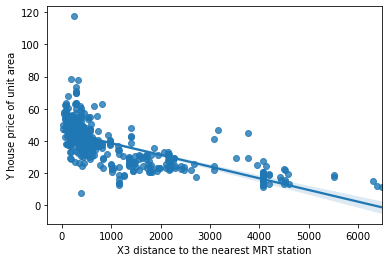

In [229]:
ax = sns.regplot(x="X3 distance to the nearest MRT station", y="Y house price of unit area", data=house)
sns.plt.xlabel('MRT')
sns.plt.show()

### Plot Number of Convienience Stores Vs Price

AttributeError: module 'seaborn' has no attribute 'plt'

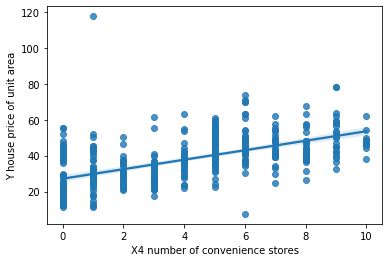

In [228]:
ax = sns.regplot(x="X4 number of convenience stores", y="Y house price of unit area", data=house)
sns.plt.xlabel('Store')
sns.plt.show()